<a href="https://colab.research.google.com/github/linyu3294/cs6220-data-minning-hw/blob/main/cs6220_hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HW1**

## **Problem 1**

### **Section A**

---
``` 
Compute the number of distinct authors, publication venues, publications, and citations/references
```
---
Function map_features parses the raw data and stores the features in a dictionary that has the following features:

 {index : 
       [ publication, 
         [list of authors],
         publication venue, 
         [list of references] 
        ]}
        
---


In [3]:
def map_features(file):
    try:
        infile = open(file, 'r')
        all_data = infile.read()
        lines = all_data.splitlines()
        features = {}

        index = 0;
        for line in lines:

            if '#index' in line:
                index = int(line.split("#index ")[1].strip())
                features[index] = [None, [], None, []]

            '''publication'''
            if '#*' in line:
                features.get(index, [])[0] = line.split("#*")[1]

            '''author'''
            if '#@' in line:
                line = line.strip()
                if line:
                    # features.get(index, [])[1] = line.split("#@ ")[1].split(";")
                    features.get(index, [])[1] = line[3:].split(';')

            '''publication venue'''
            if '#c' in line:
                features.get(index, [])[2] = line.split("#c")[1]

            '''references'''
            if '#%' in line:
                reference_list = features.get(index, [])[3]
                reference_list.append(line.split("#%")[1])

        infile.close()

    except OSError:
        print('Oops there is an error when opening your file. ',
              'Make sure you the file exists in path!')
    return features


Initiating lists and sets to store features. These features will be parsed from the dictionary.

In [4]:
file = "/content/drive/MyDrive/NEU ALIGN CS Masters/CS6220 Data Mining/Colab Notebooks/AP_train.txt"
features = map_features(file)
publications = []
authors = []
publication_venues = []
references = []


Parsing the features from the dictionary.

In [5]:
for i in features.values():
    publications.append(i[0])
    for author in i[1]:
        authors.append(author)
    publication_venues.append(i[2])
    if len(i[3]) != 0:
        for reference in i[3]:
            references.append(reference)

Deduping features by turning lists into sets.

In [6]:
unique_publications = set(publications)
unique_authors = set(authors)
unique_publication_venues = set(publication_venues)
unique_references = set(references)

Printing out the feature sets.

In [7]:
print('Total number of publications : ', len(publications))
print('Unique number of publications : ', len(unique_publications))
print('Unique number of authors : ', len(unique_authors))
print('Unique number of publication venues', len(unique_publication_venues))
print('Unique number of references', len(unique_references))

Total number of publications :  1976815
Unique number of publications :  1929487
Unique number of authors :  1484984
Unique number of publication venues 255688
Unique number of references 871092


### **Section B**

---
```
Are these numbers likely to be accurate? As an example look up all the publications venue names associated with the conference “Principles and Practice of Knowledge Discovery in Databases”13 – what do you notice?
```
---

Using unique publication venues set, search for substring 'principles and practice of knowledge discovery'. Each time this substring appears, increase count.

To answer the question, these numbers are not likely to be accurate because the raw data is not clean. Searching the exact matches will result in some ommissions or duplications.

---


In [8]:
def count_in_public_venues(public_venues):
    count = 0;
    for public_venue in public_venues:
        if public_venue.lower().__contains__('principles and practice of knowledge discovery'):
            count = count + 1
    return count



In [9]:
principles_and_practice_count = count_in_public_venues(unique_publication_venues)
print('\"Principles and Practice of Knowledge Discovery in Databases\" appears : '
      , principles_and_practice_count, ' times')

"Principles and Practice of Knowledge Discovery in Databases" appears :  5  times


### **Section C**

---
```
For each author, construct the list of publications. 
Plot a histogram of the number of publications per author (use a logarithmic scale on the y axis)
```
---

Using **mapped feature dictionary from section A**, loop through all the values of the authors. Look each of the auhtors up in the new dictionary, and if value not found, return default as 0, else return value + 1.

Here is the structure of **mapped feature dictionary from section A**


 {index : [ publication, [list of authors], publication venue, [list of references] ]}

---


 I NEED HELP WITH PLOTTING




In [10]:
import matplotlib.pyplot as plt
import numpy as np

pub_per_author_dict = {}

for i in features.values():
  for j in i[1]:
    temp = pub_per_author_dict.get(j, 0)
    pub_per_author_dict [j] = temp + 1

print (pub_per_author_dict.get(''))


pub_per_author_list = list(pub_per_author_dict.values())
pub_per_author_array = np.array(pub_per_author_list)
print (pub_per_author_array[0:30])

42176
[   48 42176    61     7    17   356    34     8     1     4     2     1
    55     9    58    99     1     1    46     1     9     4    61   204
   157   145   165     2     6    18]


(array([887684., 229402., 164499.]),
 array([1, 2, 3, 4]),
 <a list of 3 Patch objects>)

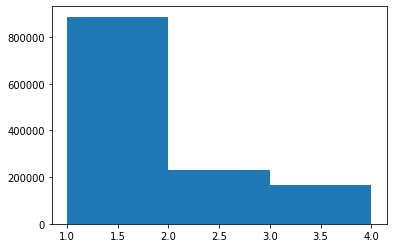

In [17]:
import matplotlib.pyplot as plt
import numpy as np


plt.hist(pub_per_author_array, [1,2,3,4])


## **Problem 2**

In [20]:
infile = '/content/drive/MyDrive/NEU ALIGN CS Masters/CS6220 Data Mining/Colab Notebooks/kosarak.dat'
max_news_index = 0;

try:
  infile = open(infile, "r")
  all_data = infile.read()
  lines = all_data.splitlines()

  for line in lines:
    if line:
      all_news_index_in_line = line.split(' ')
      for news_index in all_news_index_in_line:
        if int(news_index) > max_news_index:
          max_news_index = int(news_index)
  infile.close()
  print (max_news_index)
except OSError:
    print('Oops there is an error when opening your file. ',
          'Make sure you the file exists in path!')


41270


In [ ]:
path = chap_name

if not os.path.exists(path):
    os.makedirs(path)

try:
  outfile = open("kosarak.arff", "w")  
  outfile.write('% Title : Kosarak News Clicks Database \n\n')
  outfile.write('@relation kosarak')

  for i in max_news_index
    string = '@attribute ' + news + i + '{0, 1}' 

    
except OSError:
    print('Oops there is an error when opening your file. ',
          'Make sure you the file exists in path!')
